<a href="https://colab.research.google.com/github/joaovvrodrigues/data-analysis/blob/main/emicida_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de dados sobre as letras das músicas do Emicida**

In [112]:
quantidadeMusicas = 100

Importando algumas bibliotecas básicas

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline
plt.style.use('ggplot')

Importando bibliotecas de processamento de texto

In [114]:
import nltk    
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from string import punctuation
from nltk import FreqDist
import re

nltk.download('averaged_perceptron_tagger')
nltk.download('floresta')
nltk.download('mac_morpho')
nltk.download('machado')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopwords = set(stopwords.words('portuguese') + list(punctuation))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package floresta to /root/nltk_data...
[nltk_data]   Package floresta is already up-to-date!
[nltk_data] Downloading package mac_morpho to /root/nltk_data...
[nltk_data]   Package mac_morpho is already up-to-date!
[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data]   Package machado is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Importando biblioteca do Genius

In [115]:
!pip install lyricsgenius
import lyricsgenius

Pegando as informações das 100 músicas mais populares do Emicida

In [131]:
genius = lyricsgenius.Genius("key", skip_non_songs=True, excluded_terms=["(Remix)", "(Live)", "(Ao Vivo)"], remove_section_headers=True)
artist = genius.search_artist('Emicida', max_songs = quantidadeMusicas,  sort='popularity',  include_features=False, per_page = 50)

Searching for songs by Emicida...

Song 1: "Mandume"
Song 2: "Levanta e Anda"
Song 3: "Boa Esperança"
Song 4: "Passarinhos"
Song 5: "Bonjour"
"Mandume (Ao Vivo)" is not valid. Skipping.
Song 6: "Principia"
Song 7: "Mufete"
Song 8: "Eminência Parda"
Song 9: "Mãe"
Song 10: "Avuá"
Song 11: "8"
Song 12: "Pantera Negra"
Song 13: "Madagascar"
Song 14: "AmarElo"
Song 15: "Ismália"
Song 16: "Hoje Cedo"
Song 17: "Todos os Olhos em Nós"
Song 18: "Baiana"
Song 19: "Só Isso"
Song 20: "Triunfo"
"I’m Alive (Floresta da Tijuca)" is not valid. Skipping.
Song 21: "9nha"
Song 22: "Yasuke (Bendito, Louvado Seja)"
Song 23: "A Ordem Natural das Coisas"
Song 24: "Ooorra..."
Song 25: "Intro (É Necessário Voltar Ao Começo)"
Song 26: "Casa"
Song 27: "Paisagem"
Song 28: "Bang!"
Song 29: "Crisântemo"
Song 30: "Inácio da Catingueira"
"Minha Vida (Remix)" is not valid. Skipping.
Song 31: "Pequenas Alegrias da Vida Adulta"
Song 32: "Quem Tem Um Amigo (Tem Tudo)"
Song 33: "Cananéia, Iguape e Ilha Comprida"
Song 34: 

Salvando informações em JSON

In [128]:
artist.save_lyrics()

Lyrics_Emicida.json already exists. Overwrite?
(y/n): y
Wrote `Lyrics_Emicida.json`


Lendo JSON do artista

In [129]:
with open('Lyrics_Emicida.json') as json_data:
    data = json.load(json_data)

**Função de processamento de texto**

In [119]:
def tokenizer(tipo):
  palavras_limpas = []
  letras = []

  for i in range(quantidadeMusicas):
    letra = data['songs'][i][tipo]

    re.sub(r'[-./?!,":;()\`]',' ',letra)
    re.sub('[-|0-9]',' ', letra)

    palavras = word_tokenize(letra.lower())
    
    palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stopwords and len(palavra) > 3]
    letras.extend(palavras_sem_stopwords)
  return letras

**Função de análise de frequência de palavras**

In [120]:
def frequencia(letras, quantidade):
  frequencia = FreqDist(letras)

  mais_frequentes = frequencia.most_common(quantidade)
  mais_frequentes_quantidade = []
  for index, item in enumerate(mais_frequentes):
      mais_frequentes_quantidade.append(mais_frequentes[index][1])

  return mais_frequentes, mais_frequentes_quantidade

**Função retorna gráfico de frequência**

In [121]:
def grafico_freq(mais_frequentes, mais_frequentes_quantidade, ylabel, title):  
  palavras = mais_frequentes
  y_pos = np.arange(len(palavras))
  contagem = mais_frequentes_quantidade
  plt.figure(figsize=(15,10))
  plt.bar(y_pos, contagem, align='center', alpha=0.8)
  plt.xticks(y_pos, palavras, rotation = 90, alpha = 1)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

Análisando as letras e retornando os 20 termos mais utilizados

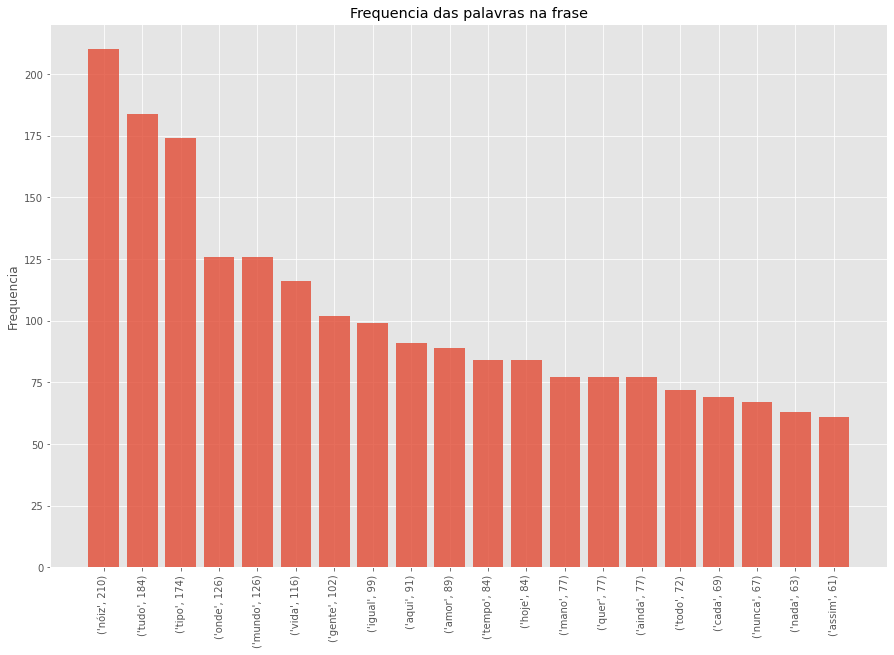

In [125]:
letras = tokenizer('lyrics')
mais_frequentes, mais_frequentes_quantidade = frequencia(letras, 20)

grafico_freq(mais_frequentes, mais_frequentes_quantidade, 'Frequencia', 'Frequencia das palavras na frase')

**WordCloud dos termos mais utilizados**

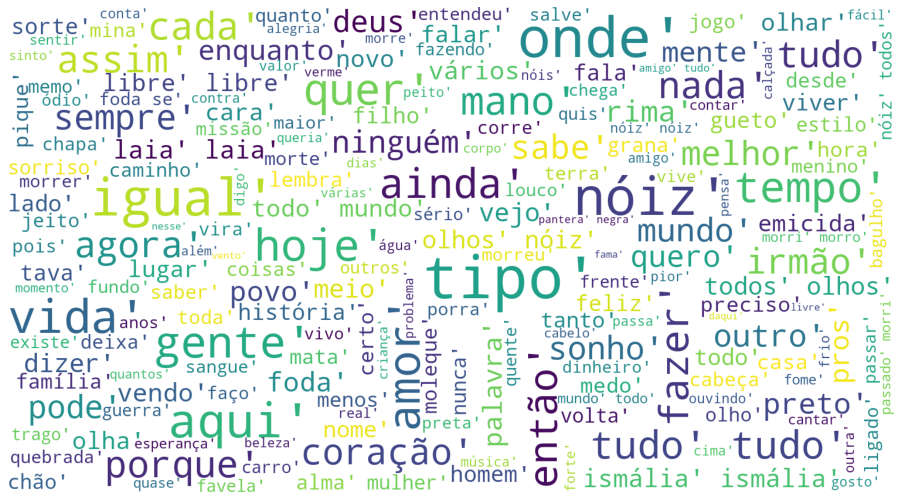

In [126]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=100, width = 1520, height = 835, background_color="white").generate(str(letras)[1:-1])
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Análisando os titulos e retornando os 20 termos mais utilizados, que serão os feats.

> Para funcionar deverá marcar include_features=True



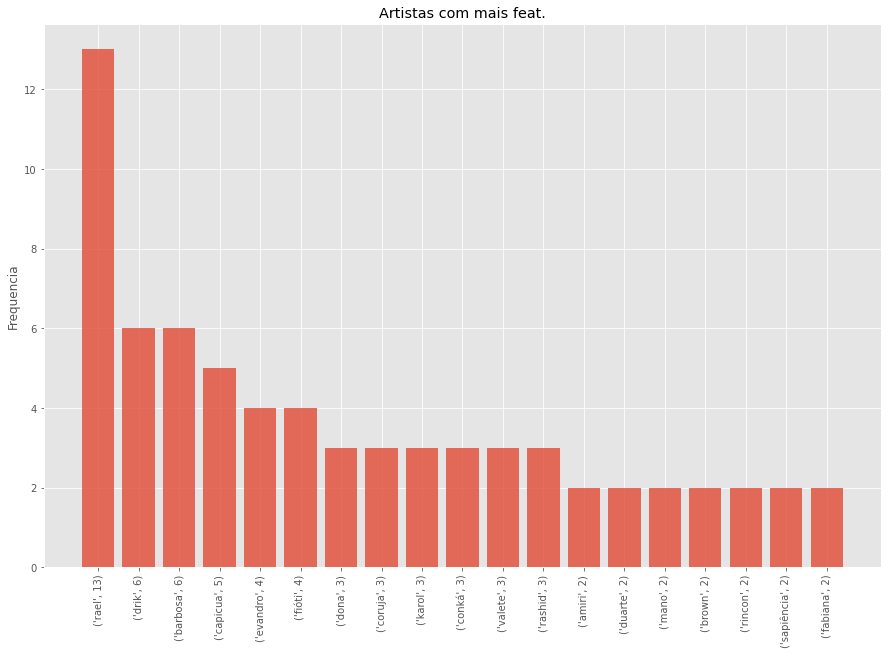

In [130]:
letras = tokenizer('title_with_featured')
mais_frequentes, mais_frequentes_quantidade = frequencia(letras, 20)

# Removendo o termo 'Emicida'
index = mais_frequentes.index('Emicida')
mais_frequentes.pop(index)
mais_frequentes_quantidade.pop(index)

grafico_freq(mais_frequentes, mais_frequentes_quantidade, 'Frequencia', 'Artistas com mais feat.')